[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['GNDI3.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
...,...,...,...,...,...,...
2020-11-03,93968.0,96250.0,93968.0,95587.0,95587.0,10191800
2020-11-04,95992.0,98296.0,95987.0,97811.0,97811.0,10704600
2020-11-05,97873.0,100922.0,97872.0,100774.0,100774.0,10455300


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,GNDI3,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,,
2020-01-02,11423.999786,13950.000000,12029.734612,2403.018570,3313.775635,3289.500046,1708.402634,1749.907684,NaN,3809.348679,10383.464813,13160.241699,17637.278748,NaN
2020-01-03,11380.000305,14089.999390,11922.434807,2404.234314,3278.921127,3320.250034,1753.774261,1754.985619,NaN,4074.700928,10507.712555,12983.593750,17637.278748,NaN
2020-01-06,11258.999634,13910.000610,11932.188988,2361.290550,3230.124664,3405.000114,1760.249519,1752.446938,NaN,3988.237762,10425.428772,13121.379089,17494.129944,NaN
2020-01-07,11223.999786,13939.999390,11898.049355,2320.268822,3155.187988,3379.500103,1756.736183,1759.438705,NaN,4052.836609,10439.418030,12703.608704,17562.170410,NaN
2020-01-08,11194.999695,13819.999695,12263.842583,2284.375763,3103.779030,3363.749886,1765.519524,1743.845558,NaN,4073.707199,10250.164795,12318.513489,16568.083191,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,9226.000214,10998.000336,24945.909500,1484.438133,2142.377853,4141.500092,1590.724659,1669.700241,NaN,4614.350510,8844.747162,11058.134460,13989.646912,11120.311737
2020-11-04,9416.000366,11200.000000,26143.793106,1473.675919,2227.929688,4319.999886,1628.494453,1760.366058,NaN,4737.585068,8845.568848,11214.468384,13994.953918,11133.393860
2020-11-05,9694.999695,11590.000153,27401.571274,1496.479416,2280.508804,4403.249931,1723.358154,1838.146210,NaN,4996.974564,8845.568848,11339.006805,13977.275085,11159.556580


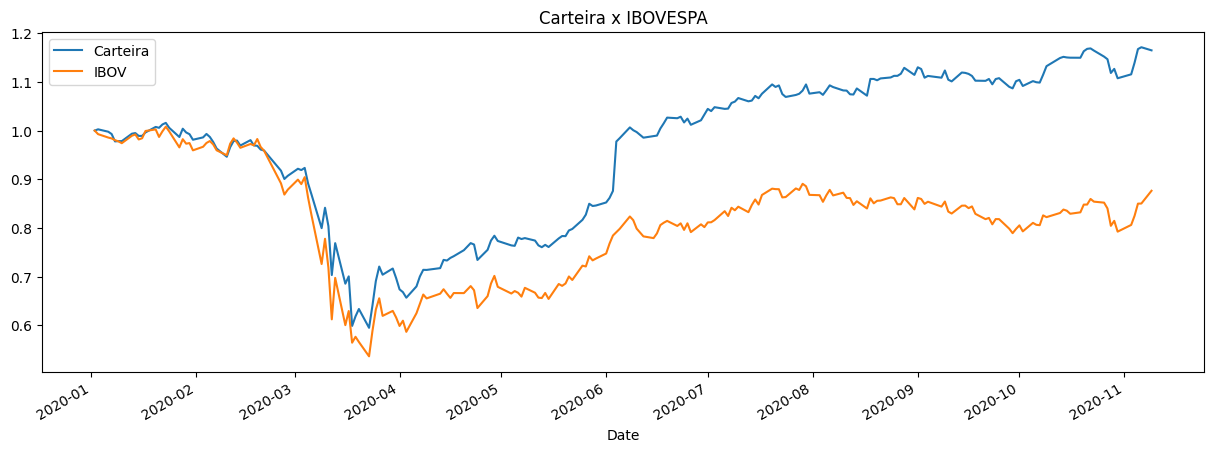

Retorno da Carteira: 16.49%
Retorno IBOV: -12.36%
0.7086810940773478


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import yfinance as web
from IPython.display import display
from tkinter import *
from tkinter import Tk
from tkinter import ttk, Scrollbar, VERTICAL

'''
class Table: 
    def __init__(self, window, data): 
        self.tree = ttk.Treeview(window, show='headings')

        # Configurar as colunas
        cols = list(data.columns)
        self.tree['columns'] = cols
        for col in cols:
            if col == '':
                pass
            else:
                self.tree.column(col, width=100, anchor='center')
                self.tree.heading(col, text=col)

        # Adicionar os dados
        for i, row in data.iterrows():
            self.tree.insert(parent='', index='end', iid=i, text='', values=tuple(row))

        # Adicionar scroll vertical
        vsb = Scrollbar(window, orient=VERTICAL, command=self.tree.yview)
        self.tree.configure(yscroll=vsb.set)
        vsb.pack(side='right', fill='y')

        self.tree.pack(expand=True)
'''

def ibovespa():
    cotacao_ibov = web.download('^BVSP', start='2020-01-01', end='2020-11-10')
    display(cotacao_ibov)
    # Criar a tabela
    # c = Table(frame_tab, data=cotacao_ibov)

    # Gráfico
    '''figura = plt.Figure(figsize=(10, 5))
    grafico = figura.add_subplot(111)
    grafico.plot(cotacao_ibov['Adj Close'])
    canva = FigureCanvasTkAgg(figura, frame_grf)
    canva.get_tk_widget().pack(side=TOP, fill=BOTH, expand=1)'''
    cotacao_ibov['Adj Close'].plot(figsize=(15,5))
    plt.title('Cotações')
    plt.show()
    plt.close()

    # Retorno Ibov
    retorno_ibov = cotacao_ibov['Adj Close'].iloc[-1] / cotacao_ibov['Adj Close'].iloc[0] - 1
    print(f'Retorno de {retorno_ibov:.2%}')

    # Retorno Ibov
    retorno_ibov = cotacao_ibov['Adj Close'].iloc[-1] / cotacao_ibov['Adj Close'].iloc[0] - 1
    print(f'Retorno de {retorno_ibov:.2%}')

    # Gráfico Média Móvel
    cotacao_ibov['Adj Close'].rolling(21).mean().plot(label='MM21')
    cotacao_ibov['Adj Close'].rolling(34).mean().plot(label='MM34')
    plt.title('Média Móvel')
    plt.show()
    plt.close()
    

def carteira_info():
    # Importar dados da carteira
    carteira = pd.read_excel('Carteira.xlsx')
    display(carteira)

    # Criar dataframe vazio
    cotacoes_carteira = pd.DataFrame()

    cotacoes_carteira = web.download('BOVA11.SA', start='2020-01-01', end='2020-11-10')
    # d = Table(window, cotacoes_carteira)
    plt.show()
    plt.close()

    # Definição linha de código de preenchimento de apenas 1 ativo
    cotacoes_carteira = pd.DataFrame()

    extracao = web.download('BOVA11.SA', start='2020-01-01', end='2020-11-10')
    cotacoes_carteira['BOVA11.SA'] = extracao ['Adj Close']
    display(cotacoes_carteira)


    # Preenchimento de vários ativos
    cotacoes_carteira = pd.DataFrame()

    for ativo in carteira['Ativos']:
        extracao = web.download(f'{ativo}.SA', start='2020-01-01', end='2020-11-10')
        cotacoes_carteira[ativo] = extracao['Adj Close']

    display(cotacoes_carteira)

    # Tratamento de problemas
    cotacoes_carteira = cotacoes_carteira.ffill()
    cotacoes_carteira.info()

    # Visualização de ativos no gráfico
    carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]
    carteira_norm.plot(figsize=(15, 5))
    plt.legend(loc='upper left')
    plt.title('Ativos')
    plt.show()
    plt.close()

def carteira_ib():
    carteira = pd.read_excel('Carteira.xlsx')
    cotacoes_carteira = pd.DataFrame()
    for ativo in carteira['Ativos']:
        extracao = web.download(f'{ativo}.SA', start='2020-01-01', end='2020-11-10')
        cotacoes_carteira[ativo] = extracao['Adj Close']

    # Coletando cotações do IBOVESPA
    cotacao_ibov = web.download('^BVSP', start='2020-01-01', end='2020-11-10')
    display(cotacao_ibov)

    # Valor investido
    valor_investido = pd.DataFrame()

    for ativo in carteira['Ativos']:
        valor_investido[ativo] = cotacoes_carteira[ativo] * carteira.loc[carteira['Ativos']==ativo, 'Qtde'].values[0]
    display(valor_investido)

    # Comparativo IBOVESPA com a carteira - Gráfico
    valor_investido['Total'] = valor_investido.sum(axis=1)

    valor_investido_norm = valor_investido / valor_investido.iloc[0]
    cotacao_ibov_norm = cotacao_ibov / cotacao_ibov.iloc[0]

    valor_investido_norm['Total'].plot(figsize=(15, 5), label='Carteira')
    cotacao_ibov_norm['Adj Close'].plot(label='IBOV')
    plt.legend()
    plt.title('Carteira x IBOVESPA')
    plt.show()
    plt.close()

    # Comparativo IBOVESPA com a carteira - Valores de Retorno

    retorno_carteira = valor_investido['Total'].iloc[-1] / valor_investido['Total'].iloc[0] - 1
    retorno_ibov = cotacao_ibov['Adj Close'].iloc[-1] / cotacao_ibov['Adj Close'].iloc[0] - 1
    print(f'Retorno da Carteira: {retorno_carteira:.2%}')
    print(f'Retorno IBOV: {retorno_ibov:.2%}')

    # Correlação
    correlacao = valor_investido['Total'].corr(cotacao_ibov['Adj Close'])
    print(F'Correlação: {correlacao}')

window = Tk()
window.title('Finanças')
window.geometry('800x800')

# Adicione o conteúdo aos botões
ibovespa_btn = ttk.Button(window, text='IBOVESPA', command=ibovespa)
ibovespa_btn.pack(pady=40)

carteira_btn = ttk.Button(window, text='Carteira', command=carteira_info)
carteira_btn.pack(pady=40)

carteira_ib_btn = ttk.Button(window, text='Carteira x IBOVESPA', command=carteira_ib)
carteira_ib_btn.pack(pady=40)

window.mainloop()